### Problem Statement
> A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

|Variable|Definition|
|:---- |:----
|User_ID|User ID|
|Product_ID|Product ID|
|Gender|Sex of User|
|Age|Age in bins|
|Occupation|Occupation (Masked)|
|City_Category|Category of the City (A,B,C)|
|Stay_In_Current_City_Years|Number of years stay in current city|
|Marital_Status|Marital Status|
|Product_Category_1|Product Category (Masked)|
|Product_Category_2|Product may belongs to other category also (Masked)|
|Product_Category_3|Product may belongs to other category also (Masked)|
|Purchase|Purchase Amount (Target Variable)|

### Evaluation
Submissions are scored on the root mean squared error (RMSE). RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors:



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from mltools.eda import eda  

In [4]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [5]:
train_file = Path.cwd().joinpath('datasource/train.csv')
test_file =  Path.cwd().joinpath('datasource/test.csv')

In [6]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [7]:
eda.extended_describe(train_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null_count,unique_count
User_ID,550068,NaN,NaN,NaN,1.00303e+06,1727.59,1e+06,1.00152e+06,1.00308e+06,1.00448e+06,1.00604e+06,0,5891
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3631
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7
Occupation,550068,NaN,NaN,NaN,8.07671,6.52266,0,2,7,14,20,0,21
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
Marital_Status,550068,NaN,NaN,NaN,0.409653,0.49177,0,0,0,1,1,0,2
Product_Category_1,550068,NaN,NaN,NaN,5.40427,3.93621,1,1,5,8,20,0,20
Product_Category_2,376430,NaN,NaN,NaN,9.84233,5.08659,2,5,9,15,18,173638,18


In [8]:
eda.extended_describe(test_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null_count,unique_count
User_ID,233599,NaN,NaN,NaN,1.00303e+06,1726.5,1e+06,1.00153e+06,1.00307e+06,1.00448e+06,1.00604e+06,0,5891
Product_ID,233599,3491,P00265242,829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3491
Gender,233599,2,M,175772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
Age,233599,7,26-35,93428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7
Occupation,233599,NaN,NaN,NaN,8.08541,6.52115,0,2,7,14,20,0,21
City_Category,233599,3,B,98566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
Stay_In_Current_City_Years,233599,5,1,82604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
Marital_Status,233599,NaN,NaN,NaN,0.41007,0.491847,0,0,0,1,1,0,2
Product_Category_1,233599,NaN,NaN,NaN,5.27654,3.73638,1,1,5,8,18,0,18
Product_Category_2,161255,NaN,NaN,NaN,9.84959,5.09494,2,5,9,15,18,72344,18


In [9]:
eda.null_analysis(train_df)

,counts,percentage
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643


In [10]:
mdfy_train_df = eda.add_col_denote_nan(train_df,nan_cols=['Product_Category_2','Product_Category_3'])

In [11]:
mdfy_train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_is_NA,Product_Category_3_is_NA
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,1,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1,1


In [12]:
import dexplot as dxp

In [13]:
product_count  = train_df.groupby(['User_ID']).agg(product_count=pd.NamedAgg(column='Product_ID', aggfunc='count'),
                                                   total_purchase =pd.NamedAgg(column='Purchase', aggfunc='sum'),
                                                   purchase_mean = pd.NamedAgg(column='Purchase', aggfunc='mean'),
                                                  ).reset_index()

In [14]:
product_count

,User_ID,product_count,total_purchase,purchase_mean
0,1000001,35,334093,9545.514286
1,1000002,77,810472,10525.610390
2,1000003,29,341635,11780.517241
3,1000004,14,206468,14747.714286
4,1000005,106,821001,7745.292453
...,...,...,...,...
5886,1006036,514,4116058,8007.894942
5887,1006037,122,1119538,9176.540984
5888,1006038,12,90034,7502.833333
5889,1006039,74,590319,7977.283784


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


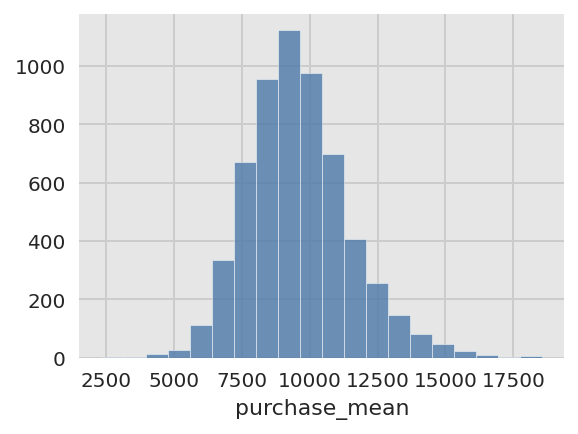

In [15]:
dxp.hist(val='purchase_mean', data=product_count)

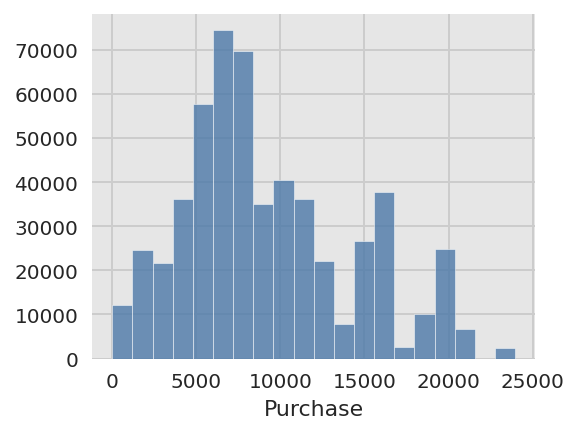

In [16]:
dxp.hist(val='Purchase', data=train_df)

In [17]:
freq_product = train_df.groupby(['User_ID','Product_ID']).agg(product_count=pd.NamedAgg(column='Product_ID', aggfunc='count')).reset_index()

In [18]:
freq_product[freq_product['product_count']>1]

,User_ID,Product_ID,product_count


In [19]:
train_df[train_df['User_ID']==1000001]['User_ID'].value_counts()

1000001    35
Name: User_ID, dtype: int64

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


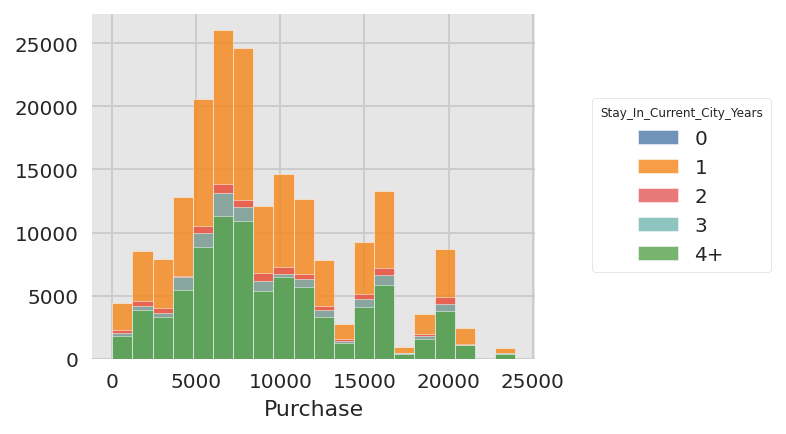

In [20]:
dxp.hist(val='Purchase', data=train_df,split ='Stay_In_Current_City_Years' )

In [21]:
stay_InCity_df  = train_df.groupby(['Product_ID','Stay_In_Current_City_Years']).agg(product_count=pd.NamedAgg(column='Product_ID', aggfunc='count'),
                                                   total_purchase =pd.NamedAgg(column='Purchase', aggfunc='sum'),
                                                   purchase_mean = pd.NamedAgg(column='Purchase', aggfunc='mean'),
                                                  ).reset_index()

In [22]:
stay_InCity_df

,Product_ID,Stay_In_Current_City_Years,product_count,total_purchase,purchase_mean
0,P00000142,0,162,1844497,11385.783951
1,P00000142,1,425,4696616,11050.861176
2,P00000142,2,212,2329728,10989.283019
3,P00000142,3,197,2231531,11327.568528
4,P00000142,4+,156,1735104,11122.461538
...,...,...,...,...,...
16582,P0099842,4+,17,115638,6802.235294
16583,P0099942,0,2,12239,6119.500000
16584,P0099942,1,8,44633,5579.125000
16585,P0099942,3,2,12236,6118.000000


In [23]:
zero_year_prod = set(train_df[train_df['Stay_In_Current_City_Years']=='0']['Product_ID'])
one_year_prod = set(train_df[train_df['Stay_In_Current_City_Years']=='1']['Product_ID'])
two_year_prod = set(train_df[train_df['Stay_In_Current_City_Years']=='2']['Product_ID'])
three_year_prod = set(train_df[train_df['Stay_In_Current_City_Years']=='3']['Product_ID'])
four_year_prod = set(train_df[train_df['Stay_In_Current_City_Years']=='4+']['Product_ID'])

In [24]:
occupation_and_stay = train_df.groupby(['Occupation','Stay_In_Current_City_Years']).agg(product_count=pd.NamedAgg(column='Product_ID', aggfunc='count'),
                                                                  total_purchase =pd.NamedAgg(column='Purchase', aggfunc='sum'),
                                                                  purchase_mean = pd.NamedAgg(column='Purchase', aggfunc='mean'),
                                                                 ).reset_index()

In [25]:
occupation_and_stay[occupation_and_stay['Stay_In_Current_City_Years']=='1']

,Occupation,Stay_In_Current_City_Years,product_count,total_purchase,purchase_mean
1,0,1,24690,227895360,9230.269745
6,1,1,16394,147055521,8970.081798
11,2,1,9776,85024133,8697.231281
16,3,1,5863,54630185,9317.786969
21,4,1,21711,199320767,9180.635024
26,5,1,5694,53290223,9359.013523
31,6,1,8631,81218651,9410.109026
36,7,1,22239,209510294,9420.850488
41,8,1,944,8775724,9296.317797
45,9,1,2503,21293375,8507.141430


In [26]:
occ_pdf = train_df.groupby(['Occupation'])['Purchase'].sum().reset_index()
occ_pdf['rank'] =occ_pdf['Purchase'].rank(ascending=False)

occ_pdf

,Occupation,Purchase,rank
0,0,635406958,2.0
1,1,424614144,4.0
2,2,238028583,10.0
3,3,162002168,12.0
4,4,666244484,1.0
5,5,113649759,15.0
6,6,188416784,11.0
7,7,557371587,3.0
8,8,14737388,21.0
9,9,54340046,20.0


In [27]:
occupation_category =pd.qcut(train_df.groupby(['Occupation'])['Purchase'].sum() ,[0.0,0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95,1.0], labels=False).fillna(-1)

In [28]:
occupation_category

Occupation
0     17
1     15
2      9
3      7
4     18
5      4
6      8
7     16
8      0
9      0
10     5
11     3
12    13
13     1
14    11
15     6
16    10
17    14
18     0
19     2
20    12
Name: Purchase, dtype: int64

In [29]:
city_product= train_df.groupby(['City_Category','Product_ID']).agg(city_prd_count=pd.NamedAgg(column='Product_ID', aggfunc='count'),
                                                   total_purchase =pd.NamedAgg(column='Purchase', aggfunc='sum'),
                                                   city_purchase_mean = pd.NamedAgg(column='Purchase', aggfunc='mean'),
                                                  ).reset_index()

In [30]:
city_product

,City_Category,Product_ID,city_prd_count,total_purchase,city_purchase_mean
0,A,P00000142,255,2824778,11077.560784
1,A,P00000242,83,825505,9945.843373
2,A,P00000342,64,333121,5205.015625
3,A,P00000442,36,169077,4696.583333
4,A,P00000542,44,203287,4620.159091
...,...,...,...,...,...
10316,C,P0099442,47,722202,15366.000000
10317,C,P0099642,3,19445,6481.666667
10318,C,P0099742,41,335044,8171.804878
10319,C,P0099842,33,251017,7606.575758


In [31]:
def merge_df(left_df,right_df,how,on,suffixes):
    if not on:
        raise valueError("Unable to join dataframes as join cols not specified")
    how = how or 'left'
    suffixes = suffixes or ('_left','_right')
    return  left_df.merge(right=right_df,how =how,on =on,suffixes=suffixes)

In [ ]:
train_df = merge_df(train_df,city_product,how ='left',on =['City_Category','Product_ID'],suffixes=('_left', '_right'))

In [ ]:
train_df.head()